# Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Helvetica'] #字体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator) #大刻度和小刻度

In [7]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Axes方法与pyplot函数

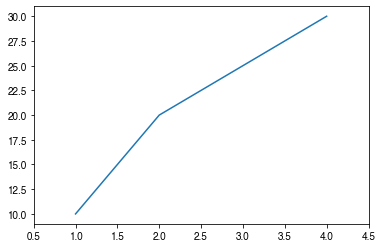

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[10,20,25,30])
plt.xlim(0.5, 4.5)
plt.savefig('./figure-1.png',dpi=400)

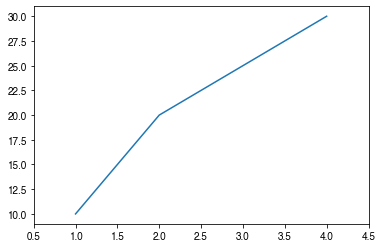

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_xlim(0.5, 4.5)
fig.savefig('./figure-2.png',dpi=400)

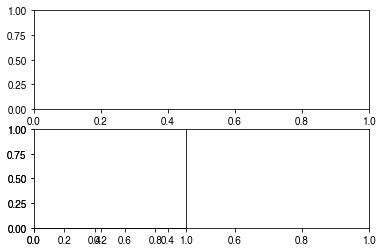

In [4]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax3 = fig.add_subplot(223)
#fig, ax =plt.subplots(1, 4, figsize=(10,6), sharey=True,dpi=200)
#fig.subplots_adjust(wspace=0)
plt.show()

# PDOS

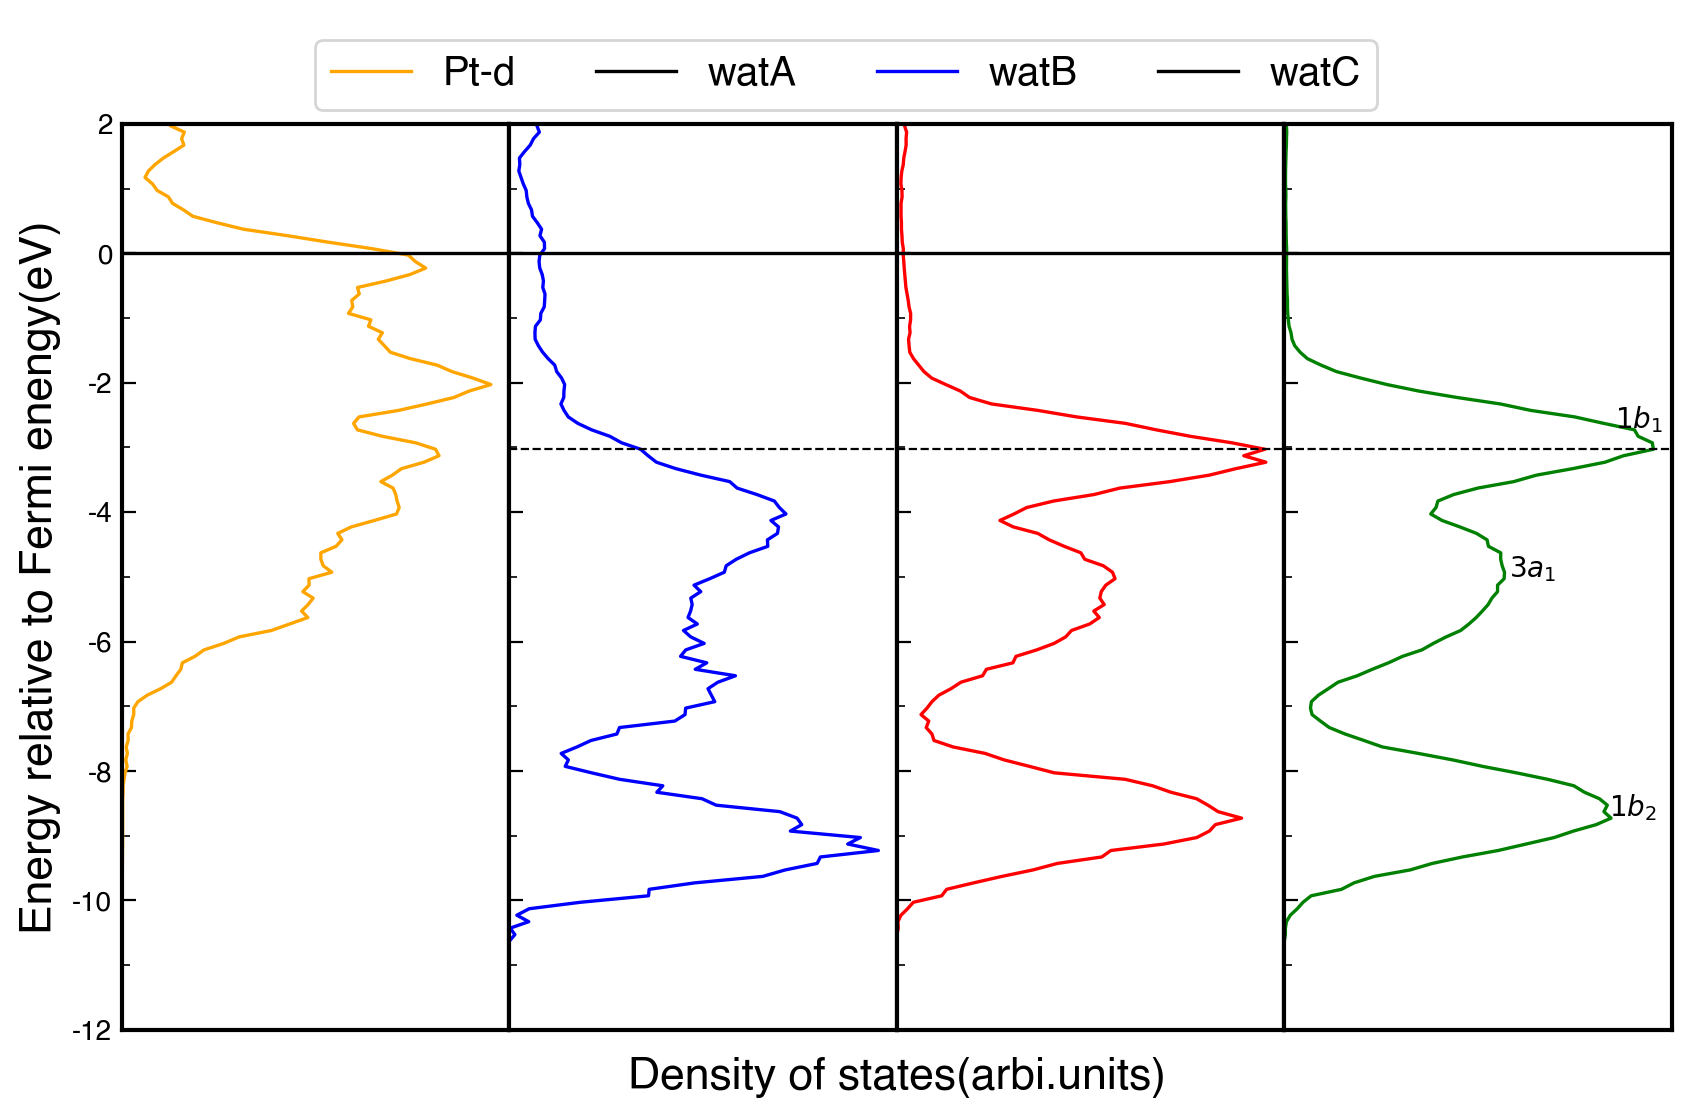

In [6]:
import numpy as np
import matplotlib.pyplot as plt
## setting
fig, ax =plt.subplots(1, 4, figsize=(10,6), sharey=True,dpi=200)
fig.subplots_adjust(wspace=0)

lw0=1.5
lw1=1.2
lw2=0.8
fs=16

## read data
file0="../data/Pt100/calculation/pdos-all/Pt.MAV"
file1="../data/Pt100/calculation/pdos-all/watA.MAV"
file2="../data/Pt100/calculation/pdos-all/watB.MAV"
file3="../data/Pt100/calculation/pdos-all/watC.MAV"

data_0 = np.loadtxt(file0)
data_1 = np.loadtxt(file1)
data_2 = np.loadtxt(file2)
data_3 = np.loadtxt(file3)

## subplot 1
ax[0].plot(data_0[:, 1], data_0[:, 0], color="orange", linewidth=lw1)

ax[0].set_yticks(np.arange(-12, 4, 2))
ax[0].set_ylim(-12, 2)

ax[0].set_ylabel('Energy relative to Fermi enengy(eV)',fontsize=fs)
ax[0].set_xlabel('Density of states(arbi.units)',fontsize=fs)
ax[0].xaxis.set_label_coords(2,-0.03)

## subplot 2
ax[1].plot(data_1[:, 1], data_1[:, 0], color="blue", linewidth=lw1)
## subplot 3
ax[2].plot(data_2[:, 1], data_2[:, 0], color="red", linewidth=lw1)
## subplot 4
ax[3].plot(data_3[:, 1], data_3[:, 0], color="green", linewidth=lw1)

## text
ax[3].text(5,-2.7,r'$1b_{1}$')
ax[3].text(3.4,-5,r'$3a_{1}$')
ax[3].text(4.9,-8.7,r'$1b_{2}$')

for i in np.arange(0, 4, 1):
 ax[i].spines['bottom'].set_linewidth(lw0)
 ax[i].spines['left'].set_linewidth(lw0)
 ax[i].spines['right'].set_linewidth(lw0)
 ax[i].spines['top'].set_linewidth(lw0)
 ax[i].yaxis.set_minor_locator(MultipleLocator(1)) 
 ax[i].yaxis.set_tick_params(which='minor', size=3,direction='in')
 ax[i].yaxis.set_tick_params(which='major', size=5,direction='in')
 ax[i].set_xlim(0,)
 ax[i].set_xticks(np.arange(-2, 12, 20))

## dash lines and solid lines
ax[0].axhline(0, ls='-', color='black',linewidth=lw1)
ax[1].axhline(0, ls='-', color='black',linewidth=lw1)
ax[1].axhline(-3.02894, ls='--', color='black',linewidth=lw2)
ax[2].axhline(0, ls='-', color='black',linewidth=lw1)
ax[2].axhline(-3.02894, ls='--', color='black',linewidth=lw2)
ax[3].axhline(0, ls='-', color='black',linewidth=lw1)
ax[3].axhline(-3.02894, ls='--', color='black',linewidth=lw2)


## legend
line_labels=["Pt-d","watA","watB","watC"]
fig.legend(labels=line_labels,loc="upper center",borderaxespad=1,ncol=4,fontsize="x-large")


fig.savefig('./Pt-PDOS.png')

# OH adsorbate site

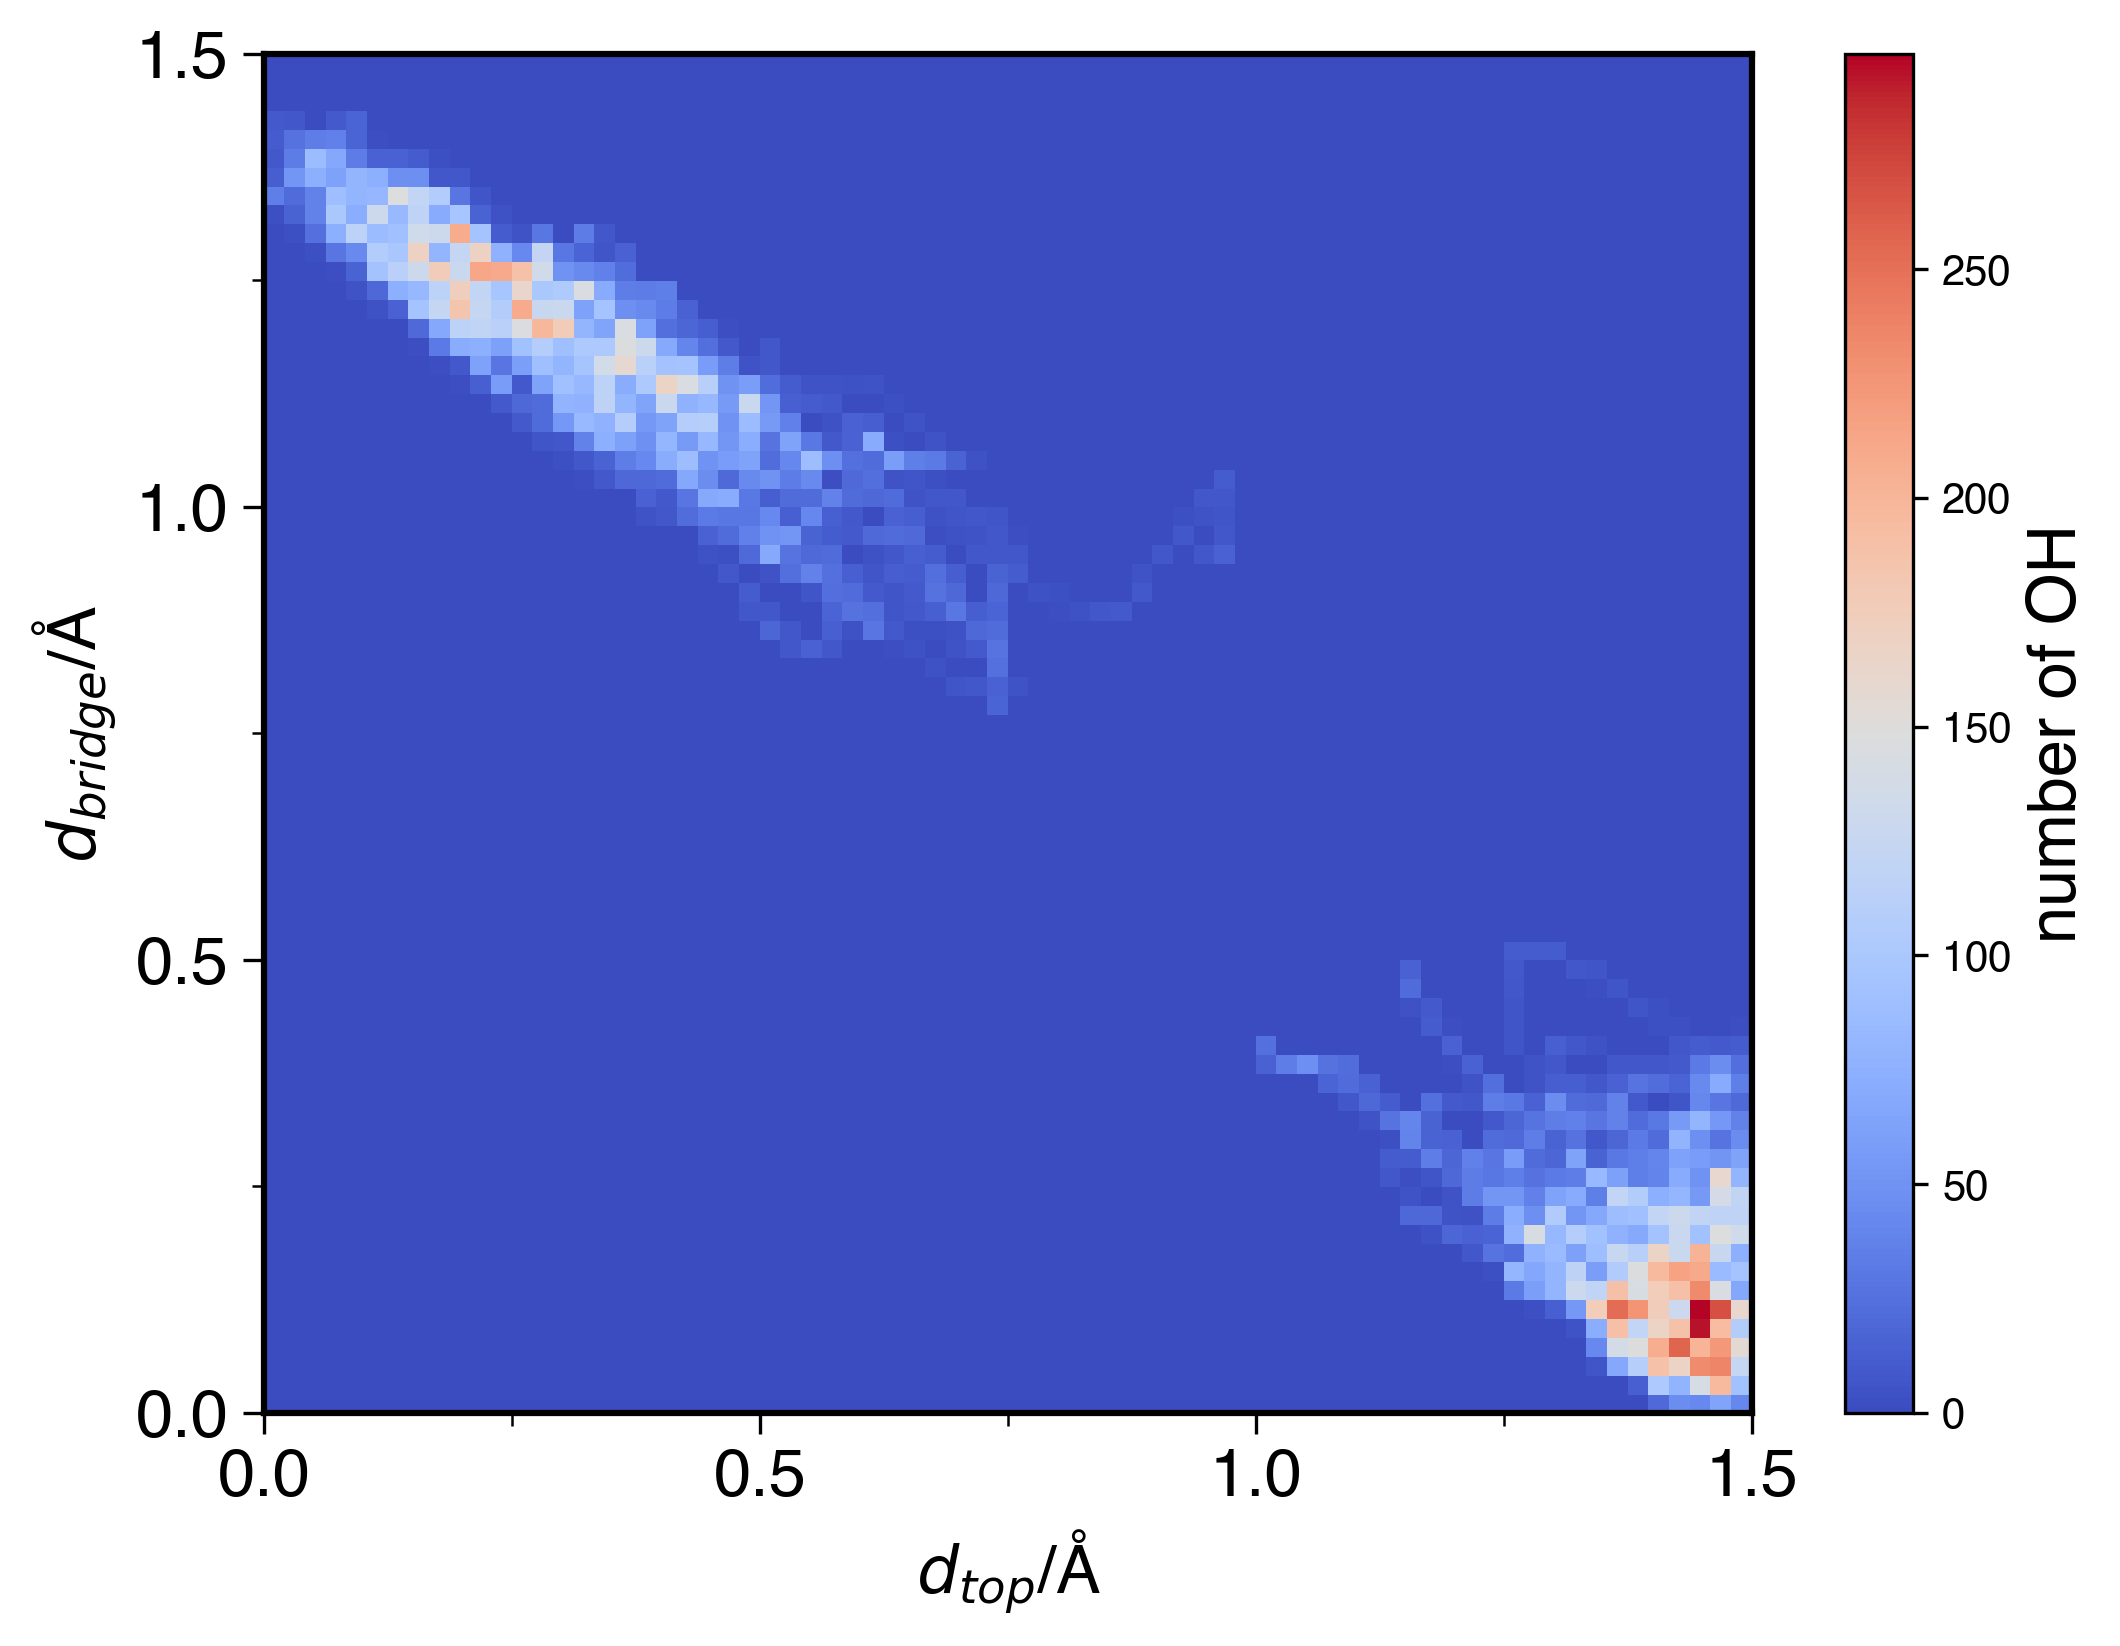

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6),dpi=300)
ax=plt.gca()

fs=16

ax.spines['bottom'].set_linewidth(lw0)
ax.spines['left'].set_linewidth(lw0)
ax.spines['right'].set_linewidth(lw0)
ax.spines['top'].set_linewidth(lw0)
ax.xaxis.set_minor_locator(MultipleLocator(0.25)) 
ax.xaxis.set_tick_params(which='minor', size=3,direction='out')
ax.xaxis.set_tick_params(which='major', size=5,direction='out')
ax.yaxis.set_minor_locator(MultipleLocator(0.25)) 
ax.yaxis.set_tick_params(which='minor', size=3,direction='out')
ax.yaxis.set_tick_params(which='major', size=5,direction='out')

tick=[0,0.5,1,1.5]
file="./1_OH.dat"
data = np.loadtxt(file)



h2d=plt.hist2d(data[:, 0], data[:, 1], bins=72,range=[[0,1.5],[0,1.5]],cmap='coolwarm')
cb=plt.colorbar()
cb.set_label(r'number of OH', fontsize=fs)                                                 

plt.xlabel(r'$d_{top}$/Å',fontsize=fs)
plt.ylabel(r'$d_{bridge}$/Å',fontsize=fs)
plt.xticks(tick,fontsize=fs)
plt.yticks(tick,fontsize=fs)

plt.savefig("./oh_ad_site.png")
plt.show()

# Free energy diagram

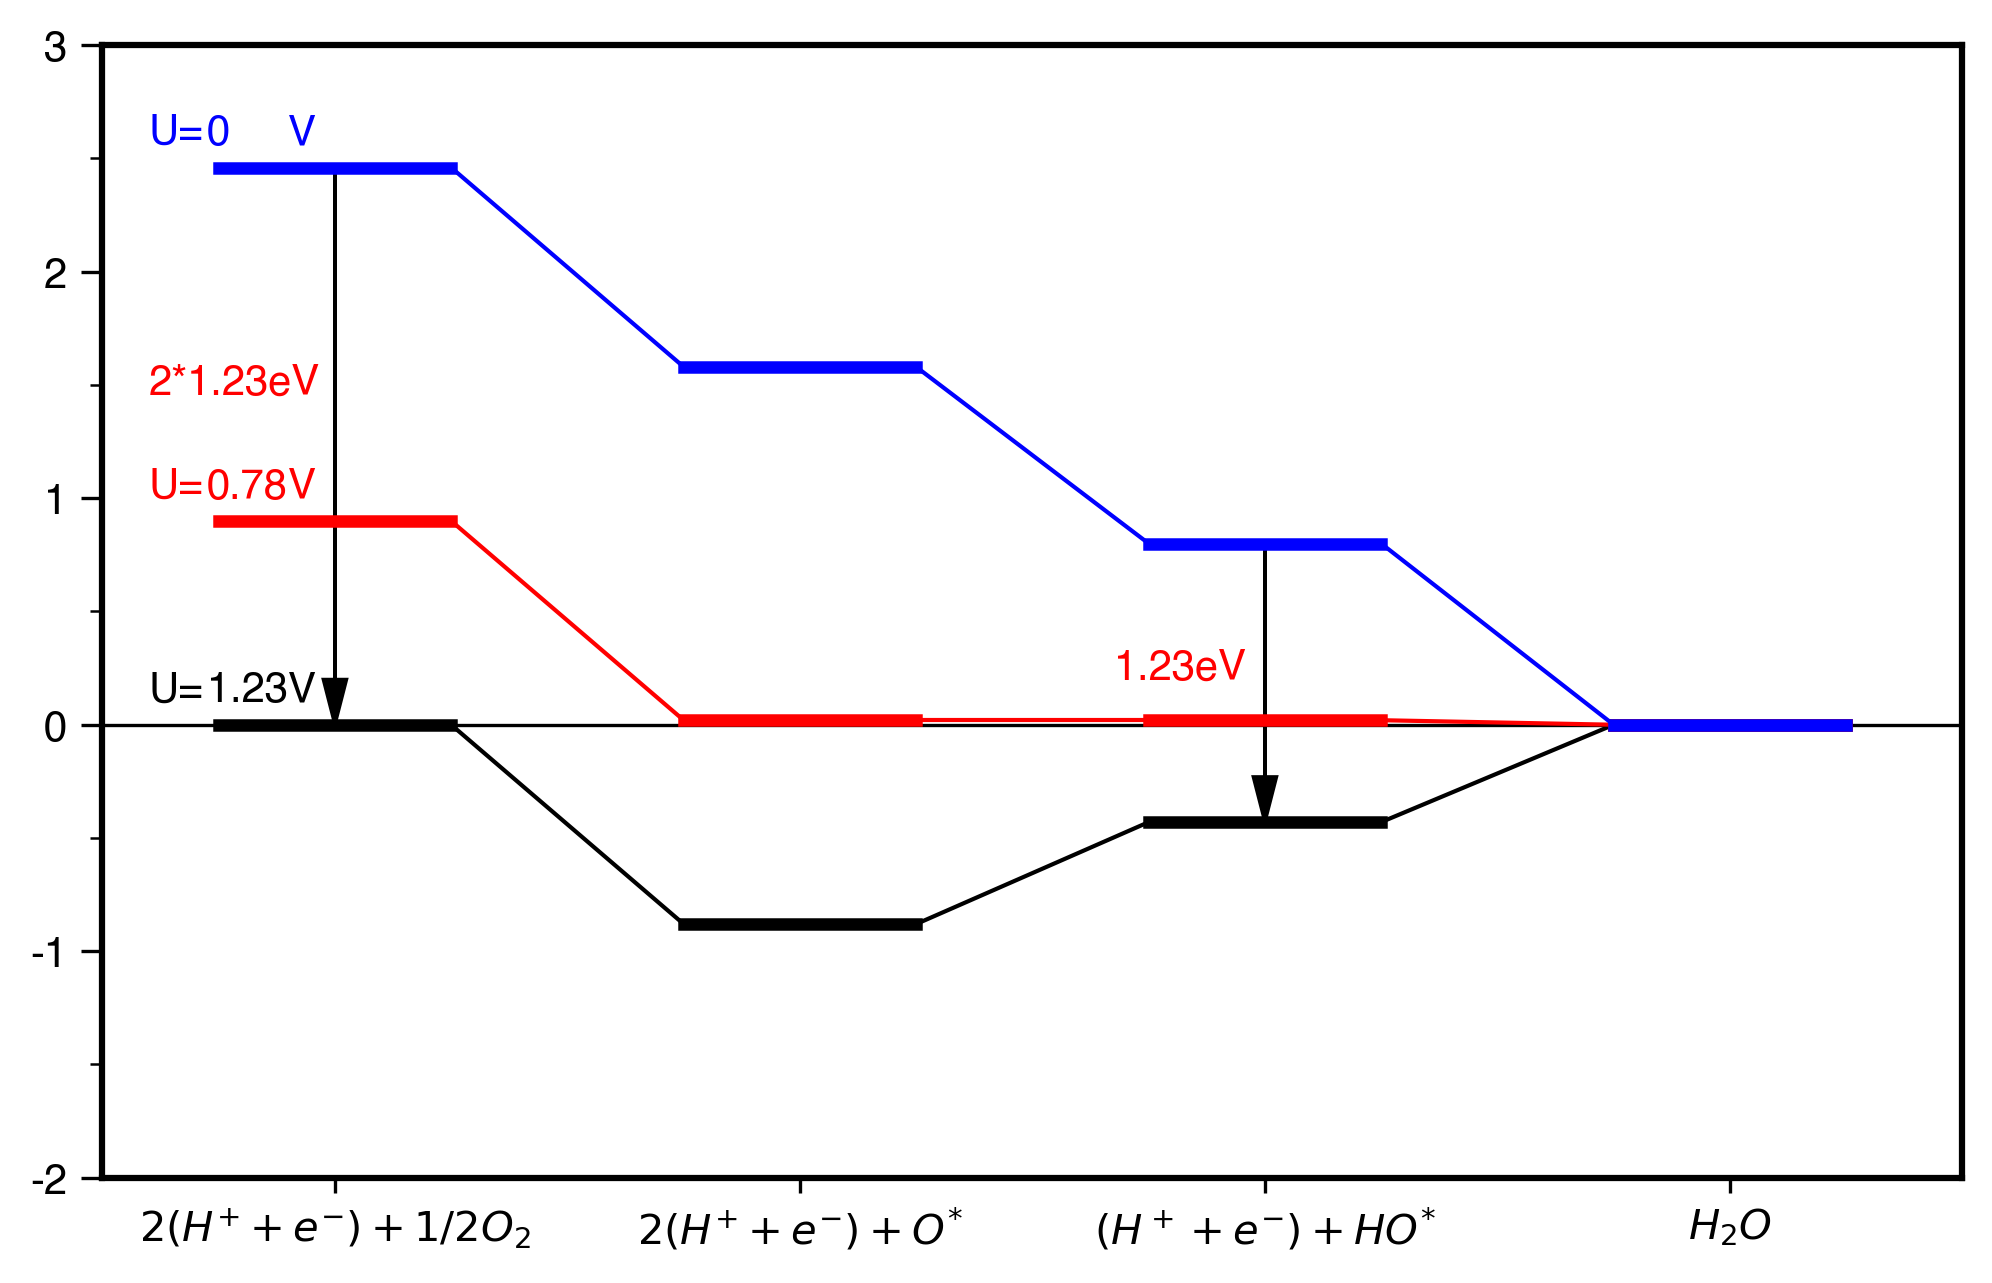

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5),dpi=300)
ax=plt.gca()

lw0=1.5
lw1=1.2
lw2=0.8
fs=16

ax.spines['bottom'].set_linewidth(lw0)
ax.spines['left'].set_linewidth(lw0)
ax.spines['right'].set_linewidth(lw0)
ax.spines['top'].set_linewidth(lw0)

ax.set_ylim(-2, 3)
ax.set_xlim(0, 8)

#plt.xticks(scale_ls, names, rotation=0, fontsize=fs)

ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
ax.yaxis.set_tick_params(which='minor', size=3,direction='out')
ax.yaxis.set_tick_params(which='major', size=5,direction='out')

ax.axhline(0, ls='-', color='black',linewidth=lw2)

potential=[1.23,0.78,0]
color=['black','red','blue']

intermidiate=[r'$2(H^{+}+e^{-})+1/2O_{2}$',r'$2(H^{+}+e^{-})+O^{*}$',r'$(H^++e^{-})+HO^{*}$',r'$H_{2}O$']

plt.xticks([1,3,5,7],intermidiate, rotation=0, fontsize=10)

for i in np.arange(0, 3, 1):
 U=potential[i]
 energy_level=[2.46-2*U,1.58-2*U,0.80-U,0]
 ax.text(0.2,energy_level[0]+0.1,'U=', color= color[i] ,fontsize=10)
 ax.text(0.45,energy_level[0]+0.1, potential[i],  color= color[i] ,fontsize=10)
 ax.text(0.8,energy_level[0]+0.1, 'V', color= color[i] ,fontsize=10)
 for j in np.arange(0, 4, 1):
  plt.plot([2*j+0.5, 2*j+1.5], [energy_level[j], energy_level[j]], ls='-', color=color[i], linewidth=3)
 for k in np.arange(0, 3, 1):
  plt.plot([2*k+1.5, 2*k+2.5], [energy_level[k],energy_level[k+1]],ls='-', color=color[i],linewidth=1)

U=potential[2]
energy_level=[2.46-2*U,1.58-2*U,0.80-U,0]
ax.arrow(1, energy_level[0], 0, 2*(potential[2]-potential[0]),
             length_includes_head=True,linewidth=lw2, ls="-",
             head_width=0.1, head_length=0.2, fc='black', ec='black')
ax.arrow(5, energy_level[2], 0, potential[2]-potential[0],
             length_includes_head=True,linewidth=lw2, ls="-",
             head_width=0.1, head_length=0.2, fc='black', ec='black')

ax.text(0.2,energy_level[0]-1,'2*1.23eV', color='red', fontsize=10)
ax.text(4.35,energy_level[3]+0.2,'1.23eV', color='red', fontsize=10)
    
plt.savefig("./free_energy_diagram.png")
plt.show()

# Energy level

[[-0.29  2.31  2.  ]
 [-1.29  3.31  2.  ]
 [-0.39  1.31  0.9 ]
 [-0.99  2.01  1.5 ]
 [-2.39  4.01  2.2 ]
 [-2.39  4.01  2.2 ]]


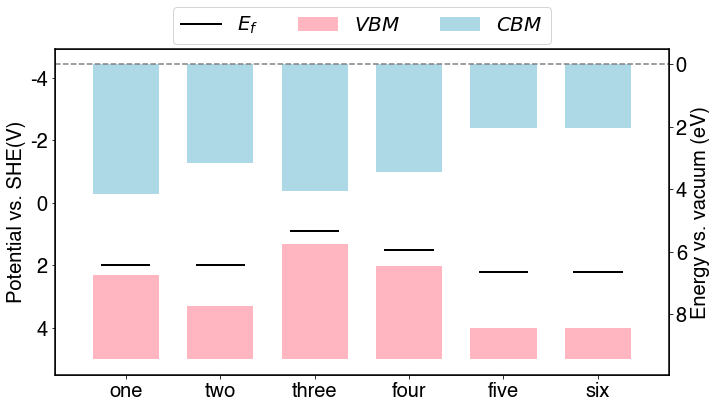

In [93]:
plot_fig = 0
linewidth=2
fs=20
lw2=1.5
le=0.2
re=1.2

dif=0.2
diff_band=0.02
diff_lim = 0.5
h_lim=5.0
l_lim=-4.44

names= ["one", "two","three", "four", "five", "six"]
levels = np.loadtxt("4.2energylevels/energylevels.txt")
print(levels)

if plot_fig == 0:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6))
if plot_fig == 1:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6), dpi=500)
ax=plt.gca()
ax.spines['bottom'].set_linewidth(lw2)
ax.spines['left'].set_linewidth(lw2)
ax.spines['right'].set_linewidth(lw2)
ax.spines['top'].set_linewidth(lw2)

plt.xlim(0, len(levels)*2+1)
plt.ylim(l_lim-diff_lim, h_lim+diff_lim)

scale_ls = np.arange(len(levels))*2+1.5
plt.xticks(scale_ls, names, rotation=0, fontsize=fs)
plt.ylabel('Potential vs. SHE(V)',fontsize=fs)
plt.yticks(fontsize=fs)

for idx, level in enumerate(levels):
    pos = idx*2+1
    if idx == 0:
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth, label=r"$E_f$")
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink", label=r"$VBM$")
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue", label=r"$CBM$")
    else:
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth)
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink")
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue")

plt.legend(bbox_to_anchor=(0., 1.02, 1., 0.102), loc="center", ncol=3, fontsize=fs)

plt.gca().invert_yaxis()
plt.axhline(-4.44, ls='--', color='grey')

ax2 = ax.twinx()
plt.ylim(l_lim-diff_lim+4.44, h_lim+diff_lim+4.44)
plt.gca().invert_yaxis()
plt.yticks(fontsize=fs)
plt.ylabel('Energy vs. vacuum (eV)',fontsize=fs)

if plot_fig == 0:
    plt.show()
if plot_fig == 1:
    plt.savefig("energylevels.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")
